In [22]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: Anahí Romo
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay


##############################################################################
warnings.simplefilter('ignore')

# https://github.com/palasatenea66/Programacion_en_Python_UNSAM/blob/master/Notas/12_Ordenamiento/iris_petal_sepal.png?raw=true
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html


In [23]:
# Cargar dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

iris_dataset = load_iris()
print("Claves del diccionario iris_dataset:\n", iris_dataset.keys())
print("Target names:", iris_dataset['target_names'])
print("Feature names:\n", iris_dataset['feature_names'])
print("Type of data:", type(iris_dataset['data']))
print("Shape of data:", iris_dataset['data'].shape)
#    Shape of data: (150, 4)
print("First five rows of data:\n", iris_dataset['data'][:5])
print("Type of target:", type(iris_dataset['target']))
print("Shape of target:", iris_dataset['target'].shape)
print("Target:\n", iris_dataset['target'])


Claves del diccionario iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Target names: ['setosa' 'versicolor' 'virginica']
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
#OTRA MANERA

iris_frame=load_iris(as_frame=True)     # como dataframe
iris_frame.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X, y = load_iris(return_X_y=True)    # como matriz np
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# OTRA FORMA MÁS: Cargamos los datos en un dataframe y etiquetamos las columnas usando los nombres de las características: iris_dataset.feature_names

iris = pd.DataFrame(iris_dataset['data'], columns = iris_dataset.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

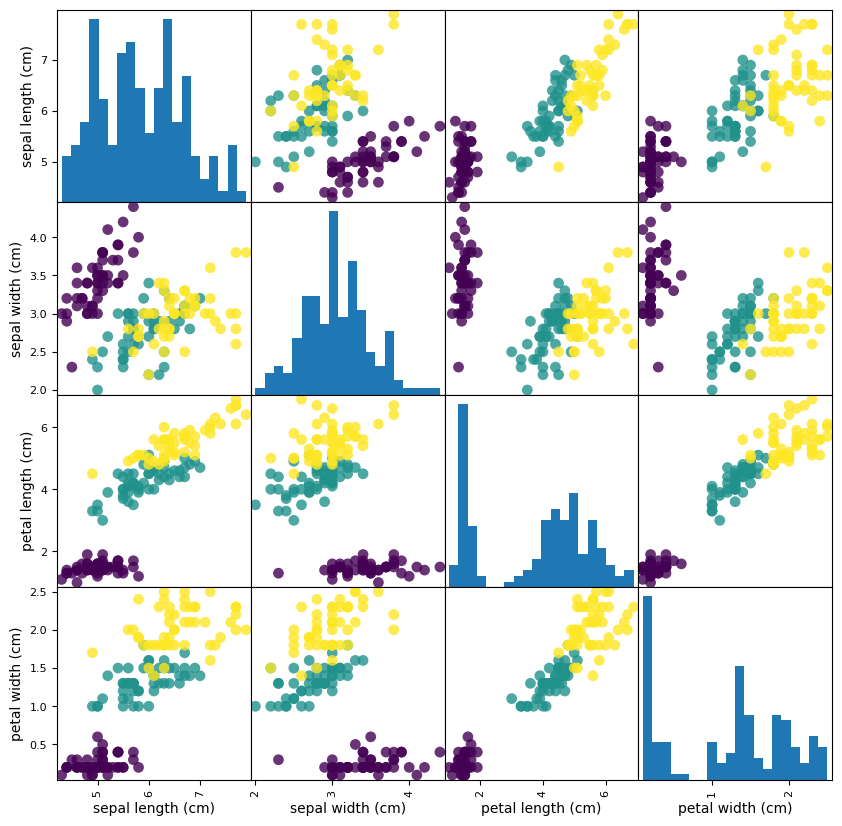

In [8]:
# hacemos una matriz de gráficos de dispersión, asignando colores según la especie

pd.plotting.scatter_matrix(iris, c = y,
                           figsize = (10, 10),
                           marker = 'o',
                           hist_kwds = {'bins': 20},
                           s = 60,
                           alpha = 0.8)


In [9]:
# Agregamos la columna target

iris['target'] = iris_dataset['target']

In [10]:
iris_frame.frame.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


target
0    50
1    50
2    50
dtype: int64


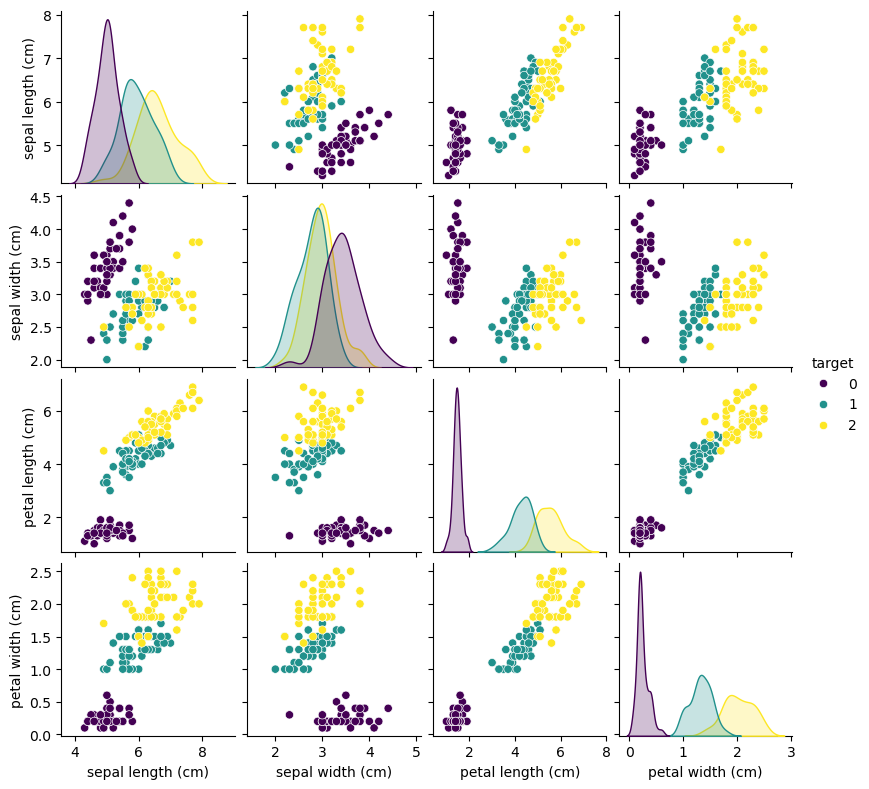

In [11]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

print(iris.groupby('target').size())    # Las clases están balanceadas?
sns.pairplot(iris, hue='target', height=2, kind='scatter', palette='viridis')

In [12]:
#  dividimos dataset en train/test, instanciamos y entrenamos el modelo de regresión logística
'''
class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001,
C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None,
solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False,
n_jobs=None, l1_ratio=None)
'''
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 0,
                                                    stratify=y)

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

X_new.shape: (1, 4)
Predicción: [0]
Nombre de Especie Predicha: ['setosa']


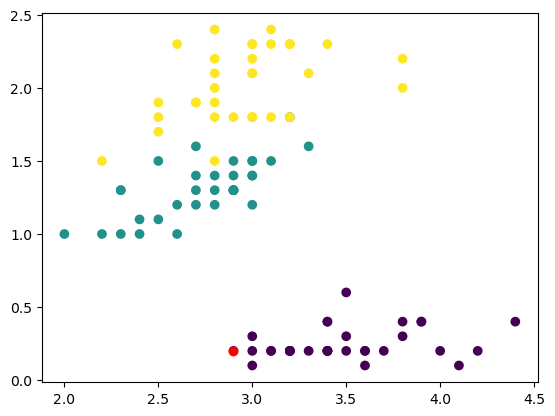

In [13]:
# agregamos una muestra nueva y miramos un poco...

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)
plt.scatter(X_train[:, 1], X_train[:, 3], c = y_train)
plt.scatter(X_new[:, 1], X_new[:, 3], c = 'red')

prediction = logreg.predict(X_new)
print("Predicción:", prediction)
print("Nombre de Especie Predicha:", iris_dataset['target_names'][prediction])

# qué tal?

[]

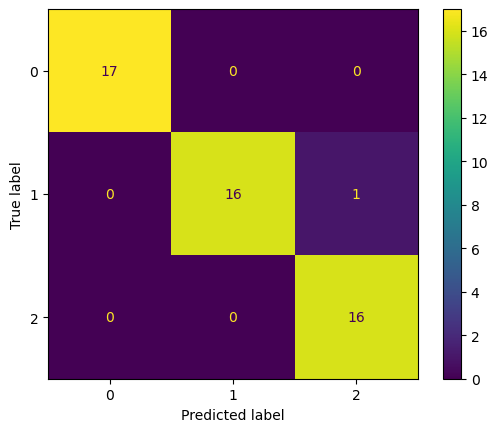

In [14]:
# vemos cómo lo hace para el cjto de test...
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
'''
classmethod from_estimator(estimator, X, y, *, labels=None, sample_weight=None,
normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal',
values_format=None, cmap='viridis', ax=None, colorbar=True, im_kw=None, text_kw=None)
'''

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test) # , normalize='all')
plt.plot()

# Bastante bien!

In [15]:
logreg.score(X_test, y_test)

0.98

In [16]:
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



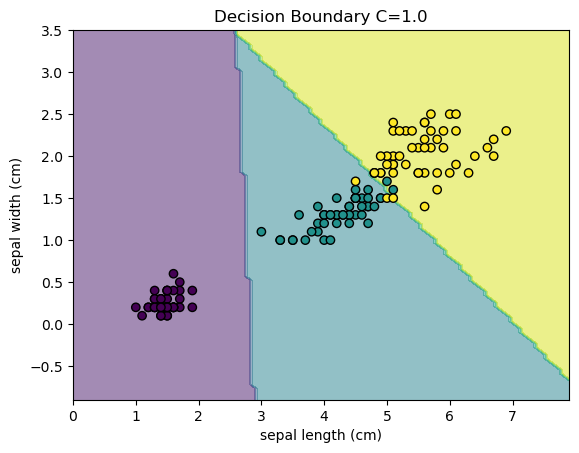

In [17]:
# AHORA VEREMOS CÓMO DIBUJA LAS ZONAS DE CADA CLASE, PARA ESO...

ce=1.  # Define el parámetro de regularización C para la regresión logística

X1 = X[:, 2:]  # Selecciona las dos últimas columnas de X (longitud y ancho del pétalo) como características

# Divide los datos en entrenamiento y prueba, manteniendo la proporción de clases
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y, test_size = 0.2, random_state = 5, stratify=y
)

# Entrena el modelo de regresión logística con las dos características seleccionadas
lr = LogisticRegression(C=ce).fit(X1_train, y1_train)

# Dibuja la frontera de decisión del modelo entrenado sobre todo el conjunto X1
disp = DecisionBoundaryDisplay.from_estimator(
    lr, X1, response_method="predict",
    xlabel=iris_frame.feature_names[0],  # Etiqueta eje X (longitud del pétalo)
    ylabel=iris_frame.feature_names[1],  # Etiqueta eje Y (ancho del pétalo)
    alpha=0.5,                           # Transparencia del fondo de la frontera
)

# Superpone los puntos de datos reales sobre la frontera de decisión
disp.ax_.scatter(X1[:, 0], X1[:, 1], c=iris.target, edgecolor="k")

plt.title(f'Decision Boundary C={ce}')  # Título indicando el valor de C usado
plt.show()  #

In [18]:
lr.score(X1_train, y1_train)

0.9583333333333334

In [19]:
lr.score(X1_test, y1_test)

0.9666666666666667

[]

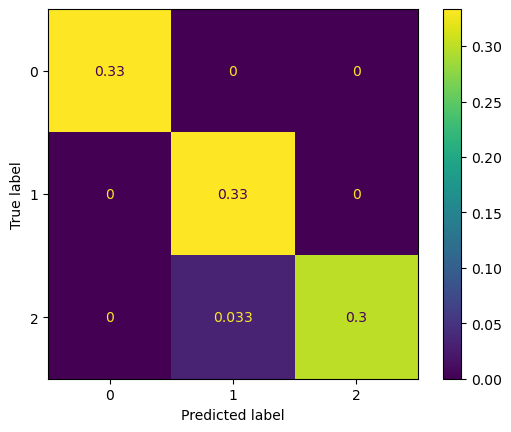

In [20]:
ConfusionMatrixDisplay.from_estimator(lr, X1_test, y1_test, normalize='all')
plt.plot()

Valores de C: [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]




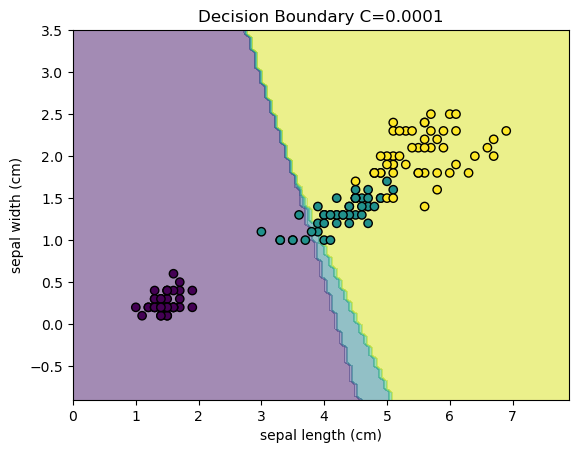

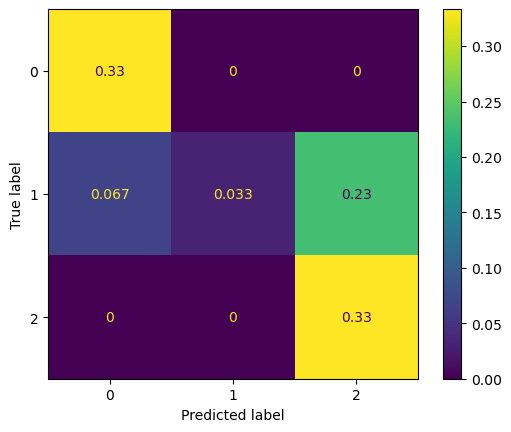

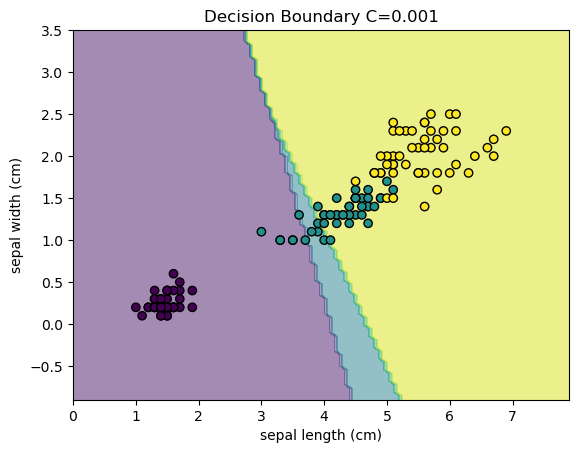

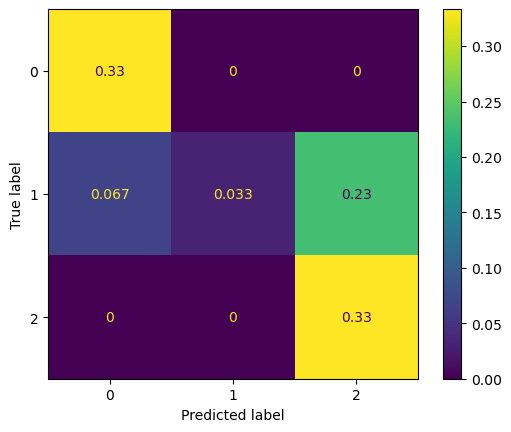

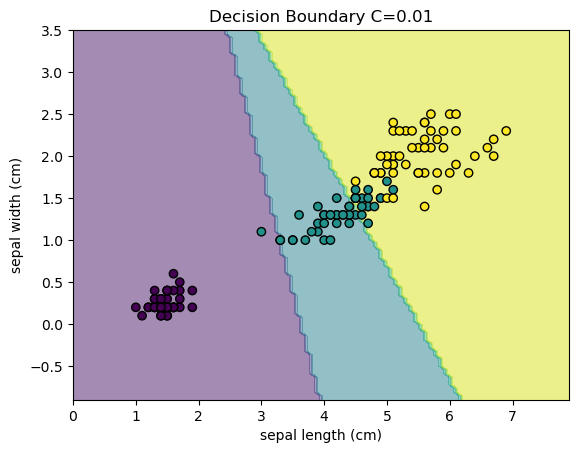

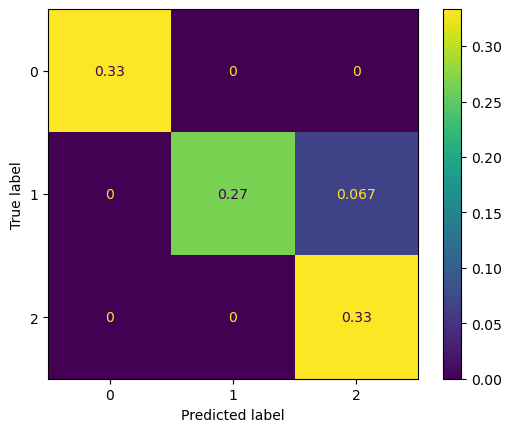

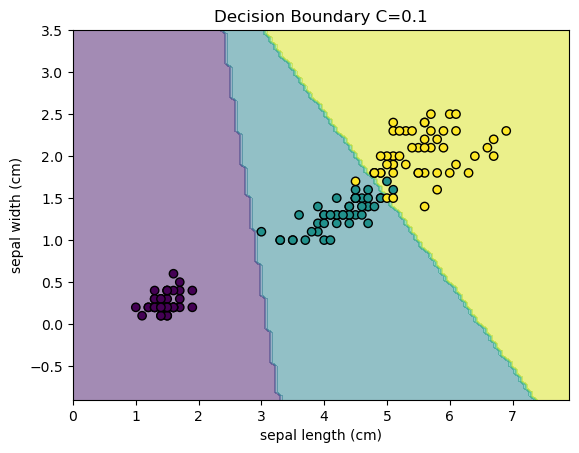

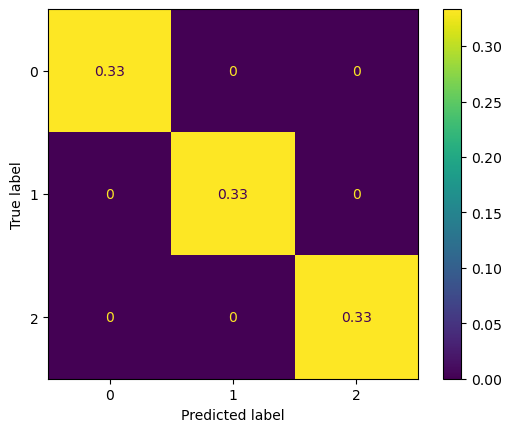

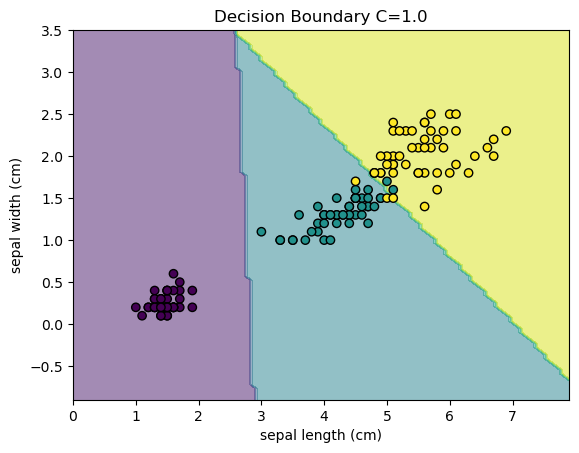

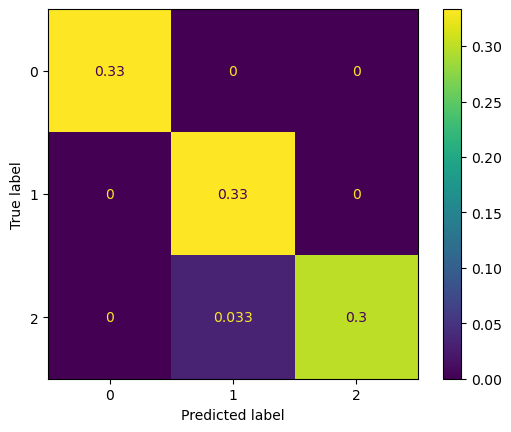

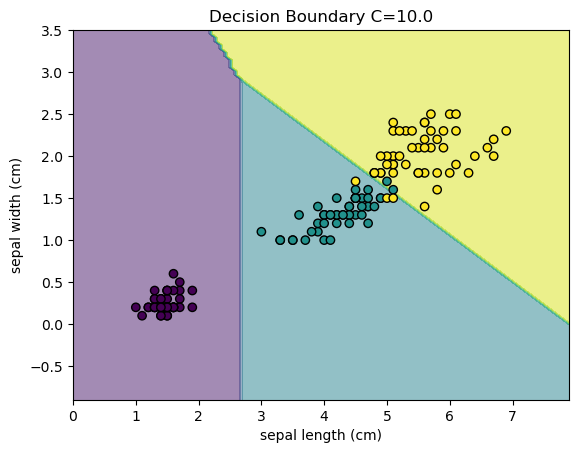

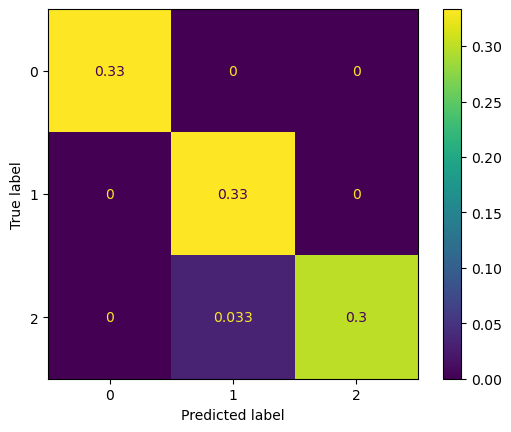

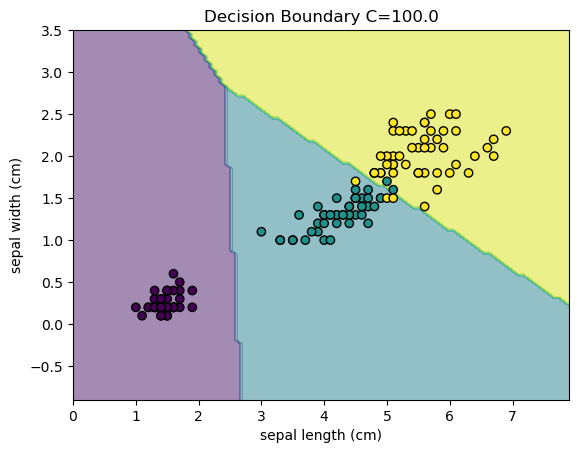

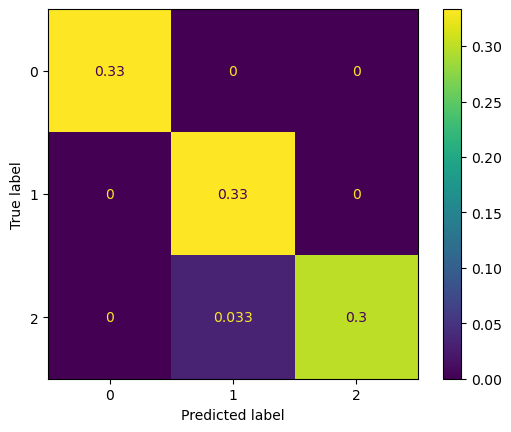

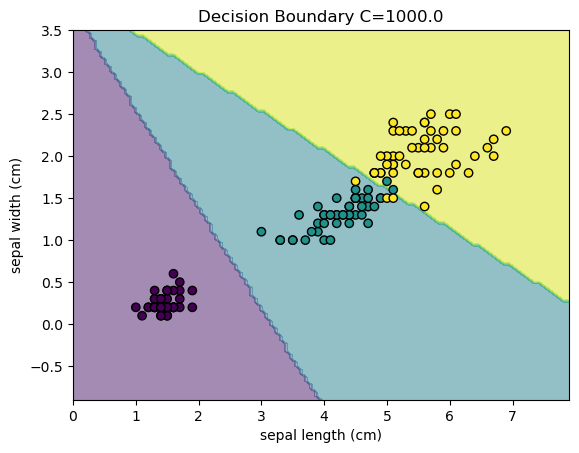

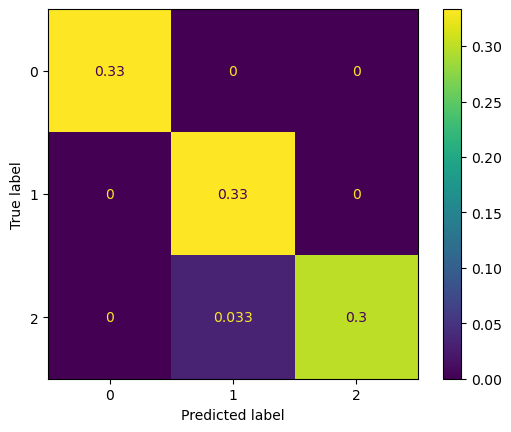

In [21]:
# VEAMOS CÓMO INFLUYE C EN LA FRONTERA ENTRE CLASES... repitamos para distintos valores de C

ces=np.logspace(-4, 3, 8)  #[10-4, 10-3, 10-2, 10-1, 1, 10, 10+2, 10+3]
print(f'Valores de C: {ces}\n\n')

for ce in ces:
    lr = LogisticRegression(C=ce).fit(X1_train, y1_train)
    disp = DecisionBoundaryDisplay.from_estimator(lr, X1, response_method="predict",
                                                  xlabel=iris_frame.feature_names[0],
                                                  ylabel=iris_frame.feature_names[1],
                                                  alpha=0.5)
    disp.ax_.scatter(X1[:, 0], X1[:, 1], c=iris.target, edgecolor="k")
    plt.title(f'Decision Boundary C={ce}')
    plt.show()
    plt.close()
    ConfusionMatrixDisplay.from_estimator(lr, X1_test, y1_test, normalize='all')
    plt.plot()
